In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class_names = ["Tasa","Cuchillo","Vaso"]

C:\Users\josue\AppData\Local\Temp\ipykernel_6296\57249960.py:30: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


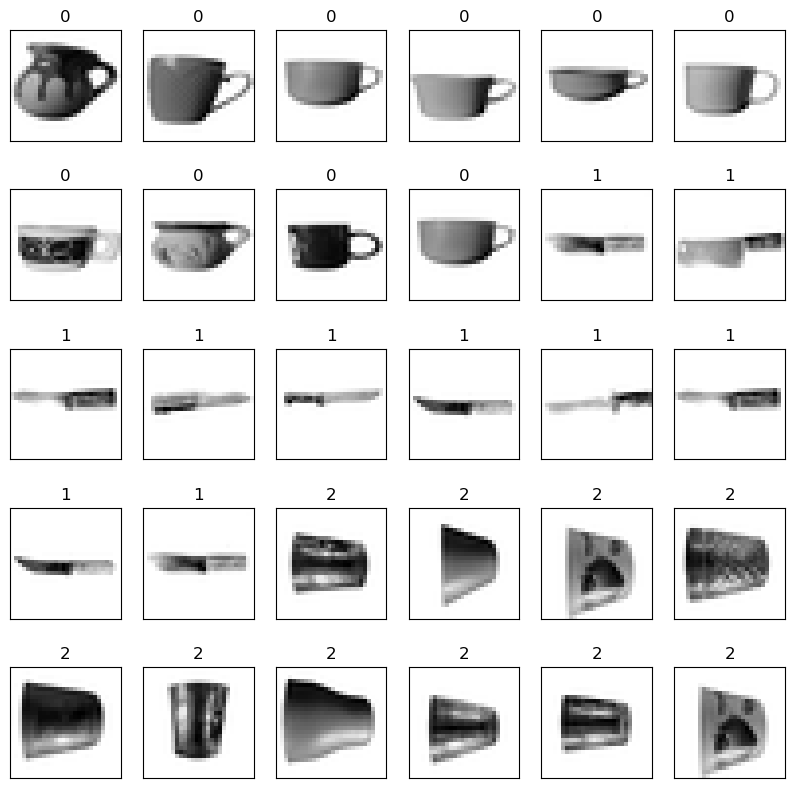

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

etiquetas = {
    "Tasa": 0,
    "Cuchillo": 1,
    "Vaso": 2
}

nombres_archivos = [
    "Tasa1.png", "Tasa2.png", "Tasa3.png", "Tasa4.png", "Tasa5.png",
    "Tasa6.png", "Tasa7.png", "Tasa8.png", "Tasa9.png", "Tasa0.png",
    "Cuchillo1.png", "Cuchillo2.png", "Cuchillo3.png", "Cuchillo4.png", "Cuchillo5.png",
    "Cuchillo6.png", "Cuchillo7.png", "Cuchillo3.png", "Cuchillo6.png", "Cuchillo1.png",
    "Vaso0.png", "Vaso1.png", "Vaso2.png", "Vaso3.png", "Vaso4.png",
    "Vaso5.png", "Vaso6.png", "Vaso7.png", "Vaso8.png", "Vaso2.png"
]

imagenes_normalizadas = []
etiquetas_asignadas = []

for nombre_archivo in nombres_archivos:
    # Buscar la etiqueta correspondiente en el nombre del archivo
    for etiqueta, valor_etiqueta in etiquetas.items():
        if etiqueta in nombre_archivo:
            etiquetas_asignadas.append(valor_etiqueta)
            break 
    imagen_original = Image.open(nombre_archivo)
    imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
    imagen_bn = imagen_redimensionada.convert("L")

    imagen_np = np.array(imagen_bn) / 255.0
    imagenes_normalizadas.append(imagen_np)

imagenes_normalizadas = np.array(imagenes_normalizadas)
etiquetas_asignadas = np.array(etiquetas_asignadas)

plt.figure(figsize=(10, 10))
for i in range(len(nombres_archivos)):
    plt.subplot(5, 6, i + 1)
    plt.imshow(imagenes_normalizadas[i], cmap='gray')  # Muestra cada imagen normalizada de la lista
    plt.title(etiquetas_asignadas[i])  # Agrega el título con la etiqueta correspondiente
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()


In [4]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y pruebas
Imagenes_train, Imagens_test, labels_train, labels_test = train_test_split(imagenes_normalizadas, etiquetas_asignadas, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y pruebas
print("Forma de X_train:", Imagenes_train.shape)
print("Forma de X_test:", Imagens_test.shape)
print("Forma de y_train:", labels_train.shape)
print("Forma de y_test:", labels_test.shape)

Forma de X_train: (24, 28, 28)
Forma de X_test: (6, 28, 28)
Forma de y_train: (24,)
Forma de y_test: (6,)


In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [7]:
model.fit(Imagenes_train, labels_train, epochs=10)

Epoch 1/10


1/1 [==============================] - 1s 1s/step - loss: 1.5805 - accuracy: 0.3333
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 1.8106 - accuracy: 0.4167
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 1.8553 - accuracy: 0.3333
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 1.3531 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.9013 - accuracy: 0.8333
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 1.1553 - accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 1.2971 - accuracy: 0.3333
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1.0297 - accuracy: 0.3333
Epoch 9/10
1/1 [==============================] - 0s 8ms/step - loss: 0.7705 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8239 - accuracy: 0.5417


In [8]:
test_loss, test_acc = model.evaluate(Imagens_test, labels_test, verbose=2)

print("\nTest accuracy:", test_acc)

1/1 - 0s - loss: 0.9555 - accuracy: 0.6667 - 179ms/epoch - 179ms/step

Test accuracy: 0.6666666865348816


In [9]:
predictions = model.predict(Imagens_test)

1/1 [==============================] - 0s 103ms/step


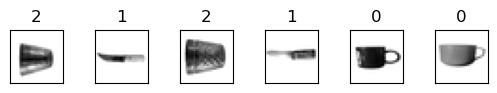

In [11]:
for i in range(len(Imagens_test)):
    plt.subplot(6, 6, i+1)
    plt.imshow(Imagens_test[i], cmap='gray')  # Muestra cada imagen normalizada de la lista
    plt.title(labels_test[i])  # Agrega el título con la etiqueta correspondiente
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

In [12]:
print("Valor mínimo de la imagen:", Imagens_test[0].min())
print("Valor máximo de la imagen:", Imagens_test[0].max())

Valor mínimo de la imagen: 0.07450980392156863
Valor máximo de la imagen: 1.0


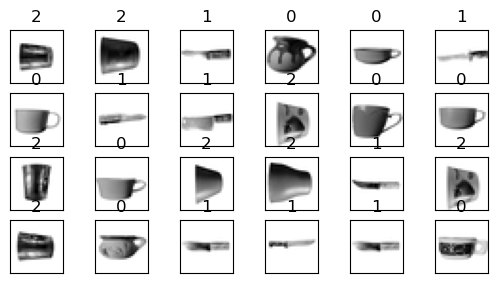

In [54]:
for i in range(len(Imagenes_train)):
    plt.subplot(6, 6, i+1)
    plt.imshow(Imagenes_train[i], cmap='gray')  # Muestra cada imagen normalizada de la lista
    plt.title(labels_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [23]:
predictions = model.predict(Imagens_test)

1/1 [==============================] - 0s 23ms/step


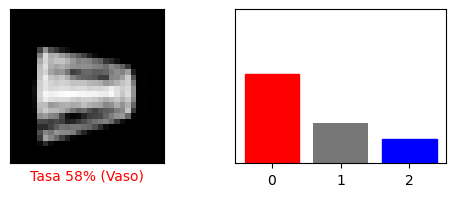

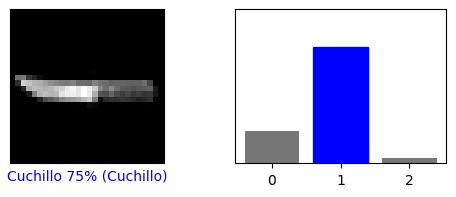

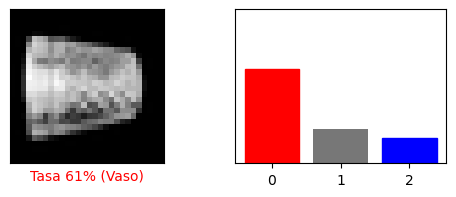

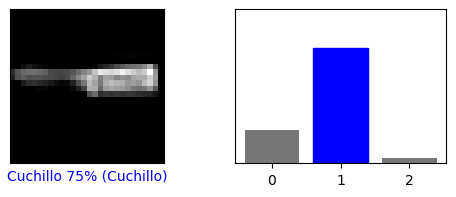

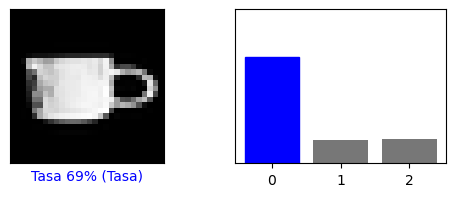

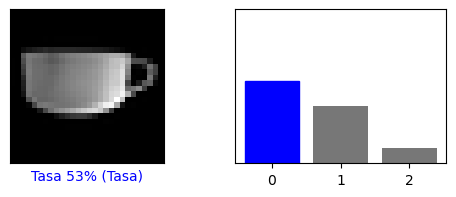

In [55]:
for index in range (6):
    plt.figure(figsize=(6,2))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], labels_test, Imagens_test)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], labels_test)
plt.show()

In [73]:
model.fit(Imagenes_train, labels_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 405ms/step - loss: 1.2696 - accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 2.6706 - accuracy: 0.2917
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 2.2190 - accuracy: 0.3333
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 1.1492 - accuracy: 0.4583
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 1.3536 - accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 1.4945 - accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 0s 8ms/step - loss: 1.1468 - accuracy: 0.6667
Epoch 8/20
1/1 [==============================] - 0s 6ms/step - loss: 1.0164 - accuracy: 0.3750
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 0.8384 - accuracy: 0.5833
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.9407 - accuracy: 0.3333
Epoch 11/20
1/1 [====================

In [74]:
test_loss, test_acc = model.evaluate(Imagens_test, labels_test, verbose=2)
print("\nTest accuracy:", test_acc)

1/1 - 0s - loss: 0.6121 - accuracy: 0.8333 - 24ms/epoch - 24ms/step

Test accuracy: 0.8333333134651184


In [75]:
predictions = model.predict(Imagens_test)

1/1 [==============================] - 0s 49ms/step


In [ ]:
for index in range (6):
    plt.figure(figsize=(6,2))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], labels_test, Imagens_test)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], labels_test)
plt.show()

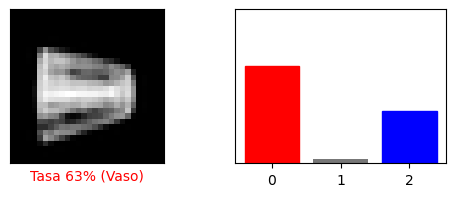

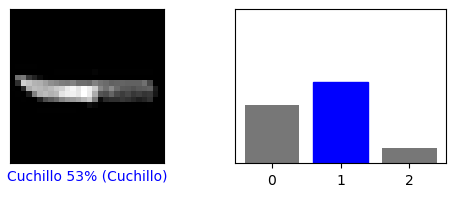

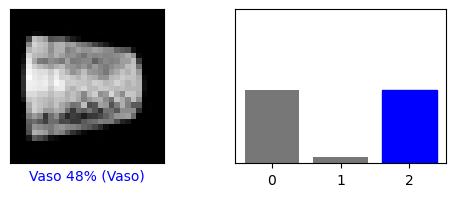

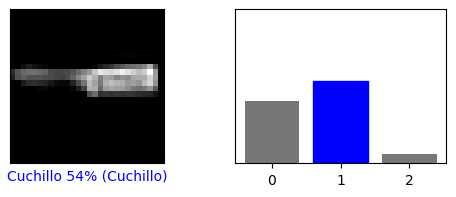

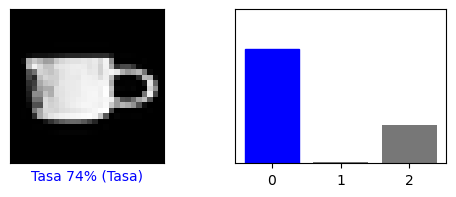

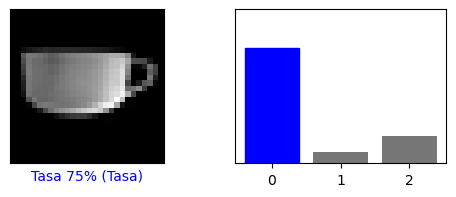

In [76]:
for index in range (6):
    plt.figure(figsize=(6,2))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], labels_test, Imagens_test)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], labels_test)
plt.show()